## Imports: libraries and dataset

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import itertools
from statsmodels.tsa.stattools import adfuller

import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR

from sklearn.preprocessing import StandardScaler

In [4]:
# Load the dataset
df = pd.read_csv('../../dataset/KAG_energydata_complete.csv')

# Convert the 'date' column to datetime format and set it as the index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

Standardize the dataset

In [5]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)

## ETS model

In [7]:
# Resample the data to daily frequency and take the mean
daily_data = df_scaled['Appliances'].resample('D').mean()

In [8]:
# Fit an ETS model
ets_model = sm.tsa.ExponentialSmoothing(daily_data, trend='add', seasonal='add', seasonal_periods=7).fit()

In [9]:
# Summary of the ETS model
ets_summary = ets_model.summary()
print(ets_summary)

                       ExponentialSmoothing Model Results                       
Dep. Variable:               Appliances   No. Observations:                  138
Model:             ExponentialSmoothing   SSE                             10.997
Optimized:                         True   AIC                           -327.092
Trend:                         Additive   BIC                           -294.893
Seasonal:                      Additive   AICC                          -324.157
Seasonal Periods:                     7   Date:                 Thu, 11 Jul 2024
Box-Cox:                          False   Time:                         10:20:37
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level              1.4901e-08                alpha                 True
smoothing_trend          

In [10]:
# Forecasting
forecast_steps = 30  # Forecast for the next 30 days
ets_forecast = ets_model.forecast(steps=forecast_steps)

actual_values = daily_data[-forecast_steps:]  # Actual values for the forecast period

In [11]:
# Calculate error metrics
ets_mae = mean_absolute_error(actual_values, ets_forecast)
ets_mse = mean_squared_error(actual_values, ets_forecast)
ets_rmse = np.sqrt(ets_mse)
ets_r2 = r2_score(actual_values, ets_forecast)

print('Mean Absolute Error (MAE):', ets_mae)
print('Mean Squared Error (MSE):', ets_mse)
print('Root Mean Squared Error (RMSE):', ets_rmse)
print('R-squared:', ets_r2)

Mean Absolute Error (MAE): 0.2189629272424196
Mean Squared Error (MSE): 0.07145463075783827
Root Mean Squared Error (RMSE): 0.26730999000755334
R-squared: 0.038837338396857435


Interpretation of data

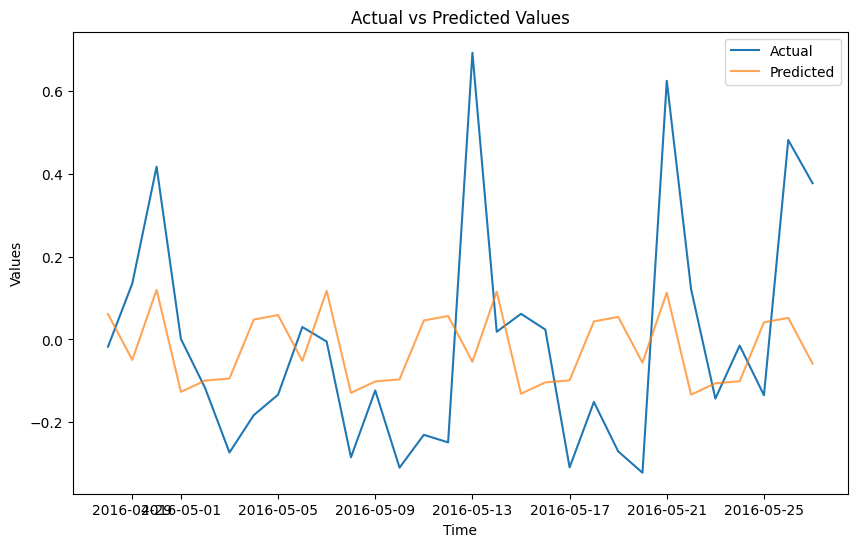

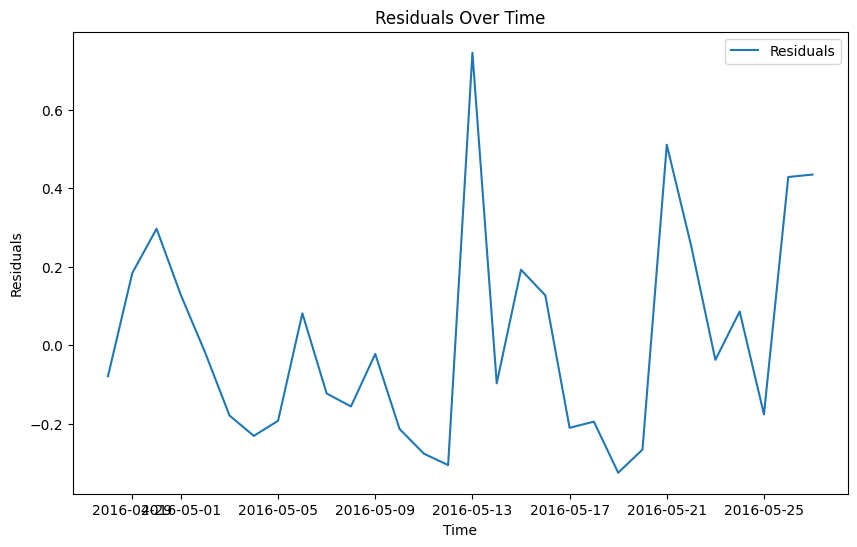

In [12]:
# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(actual_values.index, actual_values, label='Actual')
plt.plot(actual_values.index, ets_forecast, label='Predicted', alpha=0.7)
plt.title('Actual vs Predicted Values')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

# Correcting the residuals calculation and plotting
residuals = actual_values.values - ets_forecast
plt.figure(figsize=(10, 6))
plt.plot(actual_values.index, residuals, label='Residuals')
plt.title('Residuals Over Time')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.show()